# HomeWork 8
**DeadLine : 23:59 29 Aban 1400**

**Total points : 100pts**

# 1. Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: ignored

# 2. Make your costome dataset   
 **یادآوری:** این بلوک فقط یکبار اجرا شود تا دیتاست در گوگل درایو ذخیره شود
 از دفعه دوم نیازی به اجرای آن بلوک نیست
 

## 2.1. Download dataset using google scraping

download and install google scraping tools:

In [2]:
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd /content/google-images-download/ && python setup.py install

fatal: destination path 'google-images-download' already exists and is not an empty directory.
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing google_images_download.egg-info/PKG-INFO
writing dependency_links to google_images_download.egg-info/dependency_links.txt
writing entry points to google_images_download.egg-info/entry_points.txt
writing requirements to google_images_download.egg-info/requires.txt
writing top-level names to google_images_download.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'google_images_download.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.lin

costom dataset config:

In [3]:
!echo '{"Records": [{"keywords": "car","limit": 60,"size": "medium","print_urls": true},{"keywords": "bird","limit": 60,"size": "medium","print_urls": true},{"keywords": "Leopard","limit": 60,"size": "medium","print_urls": true},{"keywords": "cat","limit": 60,"size": "medium","print_urls": true},{"keywords": "dog","limit": 60,"size": "medium","print_urls": true}]}' > dataset.json

download 40-50 image for each category
maybe take 2 or 3 minute ...

In [4]:
!googleimagesdownload -cf dataset.json


Item no.: 1 --> Item name = car
Evaluating...
Starting Download...
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2019-honda-civic-sedan-1558453497.jpg?crop=1xw:0.9997727789138833xh;center,top&resize=480:*
Completed Image ====> 1.2019-honda-civic-sedan-1558453497.jpg
Image URL: https://cars.usnews.com/static/images/Auto/custom/14737/2022_Acura_ILX_1.jpg
IOError on an image...trying next one... Error: The read operation timed out
Image URL: https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/2022-chevrolet-corvette-z06-1607016574.jpg?crop=0.737xw:0.738xh;0.181xw,0.218xh&resize=640:*
Completed Image ====> 2.2022-chevrolet-corvette-z06-1607016574.jpg
Image URL: https://www.extremetech.com/wp-content/uploads/2019/12/SONATA-hero-option1-764A5360-edit-640x354.jpg
Completed Image ====> 3.sonata-hero-option1-764a5360-edit-640x354.jpg
Image URL: https://www.cnet.com/a/img/CSTqzAl5wJ57HHyASLD-a0vS2O0=/940x528/2021/04/05/9e065d90-51f2-46c5-bd3a-416fd4983c1a/elan

## 2.2 Splite data To train set && test set

In [5]:
import os
import shutil
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']

os.makedirs('./test/')
for category in categories:
    os.makedirs('./test/'+category)
os.rename('./downloads', './train')

FileExistsError: ignored

In [ ]:
import os
import shutil

categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    src_files = os.listdir(src)
    print(len(src_files))
    i=0
    for file_name in src_files:
        if i > (0.2*(len(src_files))):
            break
        full_file_name = os.path.join(src, file_name)
        if os.path.isfile(full_file_name):
            shutil.move(full_file_name, dest)
        i+=1
        


60
60
60
60
60


In [ ]:
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


## 2.2. Copy Training data to Google Drive

In [ ]:
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
shutil.move('./train/', destination)
shutil.move('./test/', destination)


'/content/drive/MyDrive/HW7_Dataset/test'

In [ ]:
for category in categories:
    src=destination+'./train/'+category
    dest=destination+'./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 3. Load Dataset From Google Drive

In [ ]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
import os
import shutil

destination='/content/drive/MyDrive/HW7_Dataset/'
if not os.path.isdir(destination):
    os.makedirs(destination)
os.system('cp -r '+destination+'train/'+ ' ./')
os.system('cp -r '+destination+'test/'+ ' ./')


0

In [ ]:
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
for category in categories:
    src='./train/'+category
    dest='./test/'+category
    print(category, 'test imagess: ' ,len(os.listdir(src)))
    print(category, 'test images: ' ,len(os.listdir(dest)))


Leopard test imagess:  47
Leopard test images:  13
bird test imagess:  47
bird test images:  13
car test imagess:  47
car test images:  13
cat test imagess:  47
cat test images:  13
dog test imagess:  47
dog test images:  13


# 4. Generator

In [6]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

train_datagen =  ImageDataGenerator(rescale=1./255)

train_datagen_aug =  ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

test_datagen_aug =  ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator_aug  = train_datagen_aug.flow_from_directory('./train', batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator_aug  = test_datagen_aug.flow_from_directory('./test', batch_size=batch_size, class_mode='categorical', shuffle=True)

train_generator = train_datagen.flow_from_directory('./train', batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator = test_datagen.flow_from_directory('./test', batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 218 images belonging to 5 classes.
Found 57 images belonging to 5 classes.
Found 218 images belonging to 5 classes.
Found 57 images belonging to 5 classes.


In [24]:
train_datagen_aug1 =  ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    fill_mode='nearest')

test_datagen_aug1 =  ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    vertical_flip=True,
    fill_mode='nearest')

train_generator_aug1  = train_datagen_aug.flow_from_directory('./train', batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator_aug1  = test_datagen_aug.flow_from_directory('./test', batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 218 images belonging to 5 classes.
Found 57 images belonging to 5 classes.


In [25]:
train_datagen_aug2 =  ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.4,
    height_shift_range=0.2,
    shear_range=0.4,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen_aug2 =  ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.4,
    height_shift_range=0.2,
    shear_range=0.4,
    zoom_range=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator_aug2  = train_datagen_aug.flow_from_directory('./train', batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator_aug2  = test_datagen_aug.flow_from_directory('./test', batch_size=batch_size, class_mode='categorical', shuffle=True)

Found 218 images belonging to 5 classes.
Found 57 images belonging to 5 classes.


In [7]:
x, y=train_generator.__getitem__(1)
print(x.shape)
print(y.shape)

(16, 256, 256, 3)
(16, 5)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


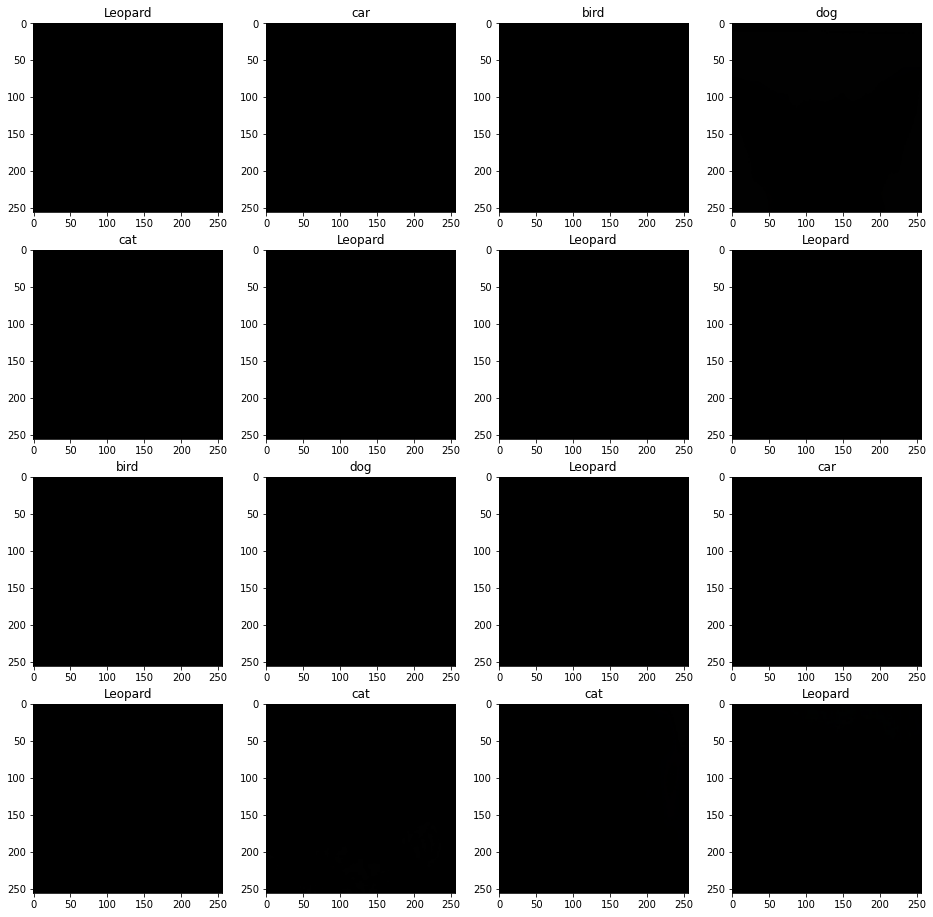

In [8]:
from matplotlib import pyplot as plt
import numpy as np
categories = ['Leopard', 'bird', 'car', 'cat', 'dog']
x, y=train_generator.__getitem__(3)

def plot_img(x_train, y_train):
    from matplotlib import pyplot as plt
    fig=plt.figure(figsize=(16, 16))
    columns = 4
    rows = 4
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        img = x_train[i-1]
        plt.imshow(img)
        plt.imshow(img.astype('uint8'))
        plt.title(categories[np.argmax(y[i-1])])
    plt.show()
plot_img(x, y)

x, y=train_generator.__getitem__(3)

# Part A: build and train model without using data augmentation

In [17]:
import tensorflow as tf
import keras

def build_model1():
  model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16, kernel_size=(7, 7), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(5, activation="softmax")
    ])
  return model

In [18]:
model = build_model1()
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
history1 = model.fit(train_generator, epochs=20, batch_size=16, validation_data=validation_generator)
model.summary()

Epoch 1/20
 3/14 [=====>........................] - ETA: 2s - loss: 1.6211 - accuracy: 0.2381

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 5s 288ms/step - loss: 1.6220 - accuracy: 0.1697 - val_loss: 1.6081 - val_accuracy: 0.1930
Epoch 2/20
14/14 [==============================] - 3s 232ms/step - loss: 1.6058 - accuracy: 0.2615 - val_loss: 1.6019 - val_accuracy: 0.1754
Epoch 3/20
14/14 [==============================] - 3s 229ms/step - loss: 1.5705 - accuracy: 0.2706 - val_loss: 1.4986 - val_accuracy: 0.2807
Epoch 4/20
14/14 [==============================] - 3s 233ms/step - loss: 1.3809 - accuracy: 0.3807 - val_loss: 1.3482 - val_accuracy: 0.3684
Epoch 5/20
14/14 [==============================] - 3s 239ms/step - loss: 1.2884 - accuracy: 0.4128 - val_loss: 1.3025 - val_accuracy: 0.4035
Epoch 6/20
14/14 [==============================] - 3s 239ms/step - loss: 1.1791 - accuracy: 0.5275 - val_loss: 1.2414 - val_accuracy: 0.4035
Epoch 7/20
14/14 [==============================] - 3s 236ms/step - loss: 0.9094 - accuracy: 0.6239 - val_loss: 1.3618 - val_accuracy: 0.4211
Epoch 8/20
14/14 

In [19]:
import matplotlib.pyplot as plt

def plot_history(history):
  acc = history.history['accuracy']
  loss = history.history['loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.title('Training accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.title('Training loss')
  plt.legend()

  plt.show()

4/4 [==============================] - 1s 158ms/step - loss: 3.2738 - accuracy: 0.4211


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


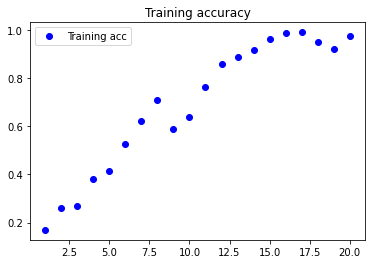

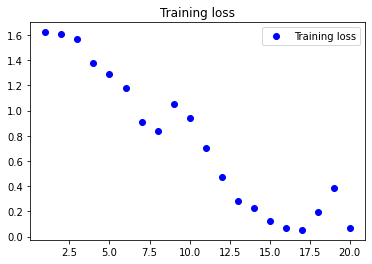

In [20]:
model.evaluate(validation_generator, batch_size=16)
plot_history(history1)

# Part B: train model using data augmentation

In [21]:
model = build_model1()
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
history2 = model.fit(train_generator_aug, epochs=20, batch_size=16, validation_data=validation_generator_aug)

Epoch 1/20
 3/14 [=====>........................] - ETA: 4s - loss: 1.7265 - accuracy: 0.1250

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 552ms/step - loss: 1.6409 - accuracy: 0.1835 - val_loss: 1.5928 - val_accuracy: 0.2281
Epoch 2/20
14/14 [==============================] - 7s 502ms/step - loss: 1.5932 - accuracy: 0.2431 - val_loss: 1.5345 - val_accuracy: 0.2982
Epoch 3/20
14/14 [==============================] - 7s 503ms/step - loss: 1.5691 - accuracy: 0.2294 - val_loss: 1.6095 - val_accuracy: 0.2456
Epoch 4/20
14/14 [==============================] - 7s 496ms/step - loss: 1.5184 - accuracy: 0.2569 - val_loss: 1.4571 - val_accuracy: 0.2807
Epoch 5/20
14/14 [==============================] - 7s 495ms/step - loss: 1.5173 - accuracy: 0.2890 - val_loss: 1.5886 - val_accuracy: 0.1754
Epoch 6/20
14/14 [==============================] - 7s 491ms/step - loss: 1.5145 - accuracy: 0.2752 - val_loss: 1.5293 - val_accuracy: 0.2982
Epoch 7/20
14/14 [==============================] - 7s 492ms/step - loss: 1.4386 - accuracy: 0.3211 - val_loss: 1.4636 - val_accuracy: 0.3509
Epoch 8/20
14/14 

4/4 [==============================] - 2s 344ms/step - loss: 1.2292 - accuracy: 0.4737


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


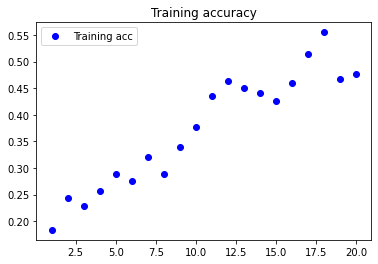

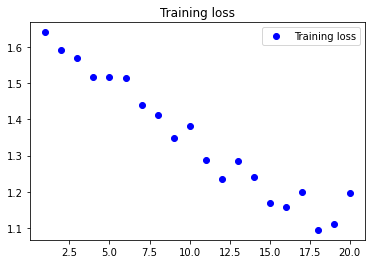

In [22]:
model.evaluate(validation_generator_aug, batch_size=16)
plot_history(history2)

In [26]:
model = build_model1()
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
history8 = model.fit(train_generator_aug1, epochs=20, batch_size=16, validation_data=validation_generator_aug1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 552ms/step - loss: 1.6692 - accuracy: 0.1697 - val_loss: 1.6091 - val_accuracy: 0.2281
Epoch 2/20
14/14 [==============================] - 7s 492ms/step - loss: 1.6093 - accuracy: 0.1789 - val_loss: 1.6047 - val_accuracy: 0.2281
Epoch 3/20
14/14 [==============================] - 7s 501ms/step - loss: 1.6098 - accuracy: 0.2064 - val_loss: 1.6090 - val_accuracy: 0.3333
Epoch 4/20
14/14 [==============================] - 7s 498ms/step - loss: 1.6094 - accuracy: 0.2477 - val_loss: 1.6061 - val_accuracy: 0.2281
Epoch 5/20
14/14 [==============================] - 7s 504ms/step - loss: 1.6014 - accuracy: 0.2661 - val_loss: 1.6126 - val_accuracy: 0.1228
Epoch 6/20
14/14 [==============================] - 7s 487ms/step - loss: 1.5876 - accuracy: 0.2477 - val_loss: 1.5646 - val_accuracy: 0.1754
Epoch 7/20
14/14 [==============================] - 7s 496ms/step - loss: 1.6062 - accuracy: 0.2431 - val_loss: 1.5593 - val_accuracy: 0.2982
Epoch 8/20
14/14 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 340ms/step - loss: 1.4348 - accuracy: 0.3860


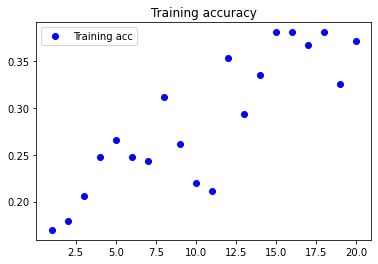

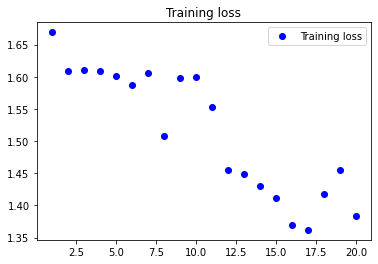

In [27]:
model.evaluate(validation_generator_aug, batch_size=16)
plot_history(history8)

In [28]:
model = build_model1()
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
history9 = model.fit(train_generator_aug2, epochs=20, batch_size=16, validation_data=validation_generator_aug2)

Epoch 1/20
 2/14 [===>..........................] - ETA: 2s - loss: 1.7514 - accuracy: 0.1538 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 528ms/step - loss: 1.6382 - accuracy: 0.1743 - val_loss: 1.6083 - val_accuracy: 0.2281
Epoch 2/20
14/14 [==============================] - 7s 489ms/step - loss: 1.6077 - accuracy: 0.2248 - val_loss: 1.5834 - val_accuracy: 0.4561
Epoch 3/20
14/14 [==============================] - 7s 490ms/step - loss: 1.5489 - accuracy: 0.2752 - val_loss: 1.4622 - val_accuracy: 0.2807
Epoch 4/20
14/14 [==============================] - 7s 505ms/step - loss: 1.5248 - accuracy: 0.2936 - val_loss: 1.4646 - val_accuracy: 0.3158
Epoch 5/20
14/14 [==============================] - 7s 493ms/step - loss: 1.4988 - accuracy: 0.3394 - val_loss: 1.4636 - val_accuracy: 0.3333
Epoch 6/20
14/14 [==============================] - 7s 501ms/step - loss: 1.4342 - accuracy: 0.3624 - val_loss: 1.4199 - val_accuracy: 0.3333
Epoch 7/20
14/14 [==============================] - 7s 499ms/step - loss: 1.4039 - accuracy: 0.3440 - val_loss: 1.4057 - val_accuracy: 0.3158
Epoch 8/20
14/14 

4/4 [==============================] - 1s 317ms/step - loss: 1.1881 - accuracy: 0.4211


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


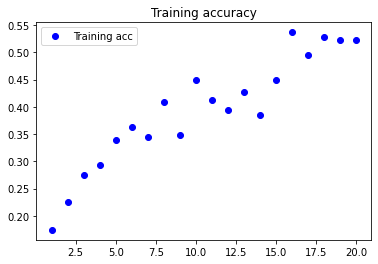

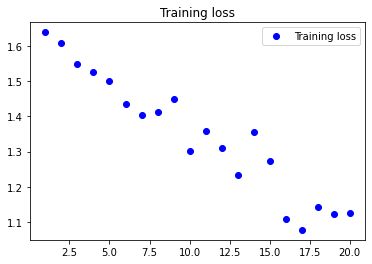

In [29]:
model.evaluate(validation_generator_aug, batch_size=16)
plot_history(history9)

# Part C: build and train model with dropout

In [30]:
import tensorflow as tf
import keras

def build_model2():
  model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16, kernel_size=(7, 7), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(5, activation="softmax")
    ])
  return model

In [31]:
model = build_model2()
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
history3 = model.fit(train_generator_aug, epochs=20, batch_size=16, validation_data=validation_generator_aug)

Epoch 1/20
 4/14 [=======>......................] - ETA: 3s - loss: 1.6251 - accuracy: 0.1875

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 538ms/step - loss: 1.6131 - accuracy: 0.1835 - val_loss: 1.5977 - val_accuracy: 0.1754
Epoch 2/20
14/14 [==============================] - 7s 493ms/step - loss: 1.5760 - accuracy: 0.2248 - val_loss: 1.5228 - val_accuracy: 0.2632
Epoch 3/20
14/14 [==============================] - 7s 494ms/step - loss: 1.5436 - accuracy: 0.2936 - val_loss: 1.5728 - val_accuracy: 0.2632
Epoch 4/20
14/14 [==============================] - 7s 494ms/step - loss: 1.5795 - accuracy: 0.2339 - val_loss: 1.4982 - val_accuracy: 0.2807
Epoch 5/20
14/14 [==============================] - 7s 494ms/step - loss: 1.5914 - accuracy: 0.2615 - val_loss: 1.5028 - val_accuracy: 0.3860
Epoch 6/20
14/14 [==============================] - 7s 491ms/step - loss: 1.4428 - accuracy: 0.2982 - val_loss: 1.5241 - val_accuracy: 0.2807
Epoch 7/20
14/14 [==============================] - 7s 495ms/step - loss: 1.4523 - accuracy: 0.2890 - val_loss: 1.4492 - val_accuracy: 0.2982
Epoch 8/20
14/14 

3/4 [=====================>........] - ETA: 0s - loss: 1.3389 - accuracy: 0.4167

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 328ms/step - loss: 1.3042 - accuracy: 0.4211


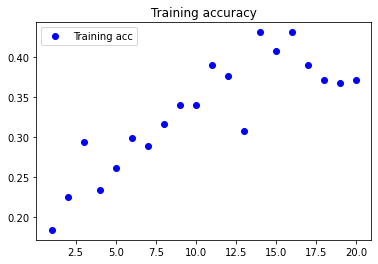

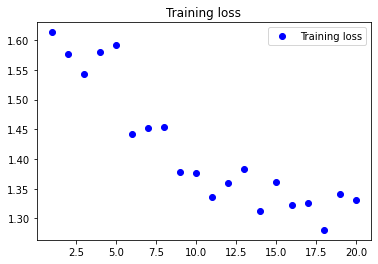

In [32]:
model.evaluate(validation_generator_aug, batch_size=16)
plot_history(history3)

In [33]:
import tensorflow as tf
import keras

def build_model3():
  model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16, kernel_size=(7, 7), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.8),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(5, activation="softmax")
    ])
  return model

In [34]:
model = build_model3()
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
history4 = model.fit(train_generator_aug, epochs=20, batch_size=16, validation_data=validation_generator_aug)

Epoch 1/20
 1/14 [=>............................] - ETA: 16s - loss: 1.6429 - accuracy: 0.1250

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 528ms/step - loss: 1.6257 - accuracy: 0.1881 - val_loss: 1.6082 - val_accuracy: 0.2281
Epoch 2/20
14/14 [==============================] - 7s 486ms/step - loss: 1.6108 - accuracy: 0.2110 - val_loss: 1.6074 - val_accuracy: 0.2281
Epoch 3/20
14/14 [==============================] - 7s 484ms/step - loss: 1.6008 - accuracy: 0.2523 - val_loss: 1.6168 - val_accuracy: 0.1754
Epoch 4/20
14/14 [==============================] - 7s 498ms/step - loss: 1.5883 - accuracy: 0.2202 - val_loss: 1.5473 - val_accuracy: 0.1930
Epoch 5/20
14/14 [==============================] - 7s 499ms/step - loss: 1.5424 - accuracy: 0.2661 - val_loss: 1.4735 - val_accuracy: 0.3509
Epoch 6/20
14/14 [==============================] - 7s 485ms/step - loss: 1.4747 - accuracy: 0.3394 - val_loss: 1.4491 - val_accuracy: 0.3684
Epoch 7/20
14/14 [==============================] - 7s 486ms/step - loss: 1.4389 - accuracy: 0.3211 - val_loss: 1.4682 - val_accuracy: 0.3158
Epoch 8/20
14/14 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 334ms/step - loss: 1.4579 - accuracy: 0.3509


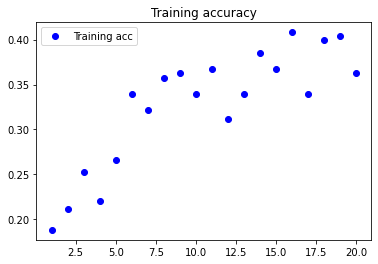

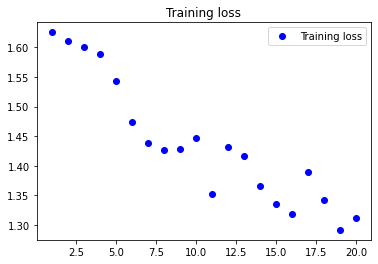

In [35]:
model.evaluate(validation_generator_aug, batch_size=16)
plot_history(history4)

In [36]:
import tensorflow as tf
import keras

def build_model4():
  model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16, kernel_size=(7, 7), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(5, activation="softmax")
    ])
  return model

In [37]:
model = build_model4()
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
history5 = model.fit(train_generator_aug, epochs=20, batch_size=16, validation_data=validation_generator_aug)

Epoch 1/20
 8/14 [================>.............] - ETA: 2s - loss: 1.6725 - accuracy: 0.1719

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 540ms/step - loss: 1.6492 - accuracy: 0.1743 - val_loss: 1.6099 - val_accuracy: 0.1754
Epoch 2/20
14/14 [==============================] - 7s 487ms/step - loss: 1.6026 - accuracy: 0.2477 - val_loss: 1.5929 - val_accuracy: 0.1579
Epoch 3/20
14/14 [==============================] - 7s 492ms/step - loss: 1.5729 - accuracy: 0.2431 - val_loss: 1.5247 - val_accuracy: 0.2982
Epoch 4/20
14/14 [==============================] - 7s 481ms/step - loss: 1.5581 - accuracy: 0.2569 - val_loss: 1.5992 - val_accuracy: 0.2281
Epoch 5/20
14/14 [==============================] - 7s 482ms/step - loss: 1.5955 - accuracy: 0.2110 - val_loss: 1.5953 - val_accuracy: 0.2105
Epoch 6/20
14/14 [==============================] - 7s 492ms/step - loss: 1.5414 - accuracy: 0.2615 - val_loss: 1.4616 - val_accuracy: 0.3158
Epoch 7/20
14/14 [==============================] - 7s 481ms/step - loss: 1.5811 - accuracy: 0.2798 - val_loss: 1.6055 - val_accuracy: 0.1930
Epoch 8/20
14/14 

2/4 [==============>...............] - ETA: 0s - loss: 1.4212 - accuracy: 0.3438

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 2s 349ms/step - loss: 1.4651 - accuracy: 0.3158


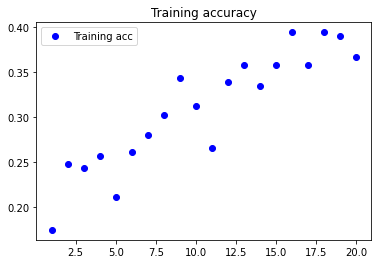

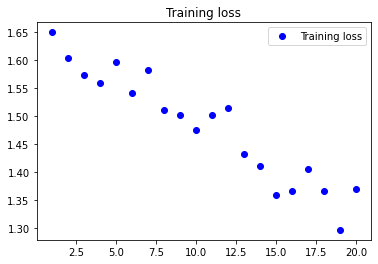

In [38]:
model.evaluate(validation_generator_aug, batch_size=16)
plot_history(history5)

In [39]:
import tensorflow as tf
import keras

def build_model5():
  model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16, kernel_size=(7, 7), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.35),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(5, activation="softmax")
    ])
  return model

In [40]:
model = build_model4()
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
history6 = model.fit(train_generator_aug, epochs=20, batch_size=16, validation_data=validation_generator_aug)

Epoch 1/20
 4/14 [=======>......................] - ETA: 3s - loss: 1.6833 - accuracy: 0.1379

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 558ms/step - loss: 1.6339 - accuracy: 0.2018 - val_loss: 1.6046 - val_accuracy: 0.1754
Epoch 2/20
14/14 [==============================] - 7s 500ms/step - loss: 1.5823 - accuracy: 0.2156 - val_loss: 1.5445 - val_accuracy: 0.2807
Epoch 3/20
14/14 [==============================] - 7s 492ms/step - loss: 1.5247 - accuracy: 0.2385 - val_loss: 1.5438 - val_accuracy: 0.3333
Epoch 4/20
14/14 [==============================] - 7s 491ms/step - loss: 1.5273 - accuracy: 0.3165 - val_loss: 1.5039 - val_accuracy: 0.3333
Epoch 5/20
14/14 [==============================] - 7s 490ms/step - loss: 1.4966 - accuracy: 0.2982 - val_loss: 1.4563 - val_accuracy: 0.2982
Epoch 6/20
14/14 [==============================] - 7s 499ms/step - loss: 1.4713 - accuracy: 0.3303 - val_loss: 1.4961 - val_accuracy: 0.3158
Epoch 7/20
14/14 [==============================] - 7s 494ms/step - loss: 1.4455 - accuracy: 0.3211 - val_loss: 1.3857 - val_accuracy: 0.3860
Epoch 8/20
14/14 

2/4 [==============>...............] - ETA: 0s - loss: 1.4809 - accuracy: 0.3438

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 334ms/step - loss: 1.4147 - accuracy: 0.4211


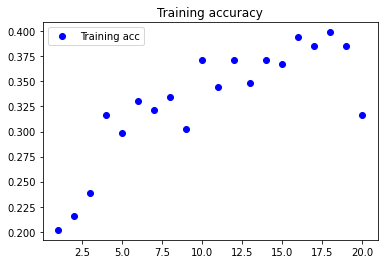

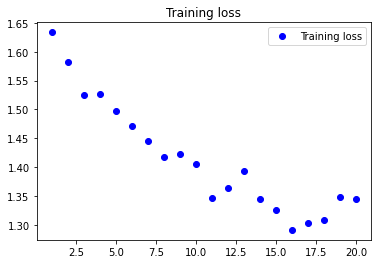

In [41]:
model.evaluate(validation_generator_aug, batch_size=16)
plot_history(history6)

In [42]:
import tensorflow as tf
import keras

def build_model6():
  model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16, kernel_size=(7, 7), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(5, activation="softmax")
    ])
  return model

In [43]:
model = build_model6()
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(loss= loss, optimizer= optimizer, metrics=["accuracy"])
history7 = model.fit(train_generator_aug, epochs=20, batch_size=16, validation_data=validation_generator_aug)

Epoch 1/20
 2/14 [===>..........................] - ETA: 4s - loss: 2.1875 - accuracy: 0.2812 

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


14/14 [==============================] - 8s 531ms/step - loss: 1.8034 - accuracy: 0.1972 - val_loss: 1.6096 - val_accuracy: 0.1930
Epoch 2/20
14/14 [==============================] - 7s 485ms/step - loss: 1.6095 - accuracy: 0.2018 - val_loss: 1.6096 - val_accuracy: 0.1930
Epoch 3/20
14/14 [==============================] - 7s 491ms/step - loss: 1.6095 - accuracy: 0.2018 - val_loss: 1.6093 - val_accuracy: 0.1930
Epoch 4/20
14/14 [==============================] - 7s 485ms/step - loss: 1.6096 - accuracy: 0.2018 - val_loss: 1.6093 - val_accuracy: 0.1930
Epoch 5/20
14/14 [==============================] - 7s 485ms/step - loss: 1.6094 - accuracy: 0.1881 - val_loss: 1.6092 - val_accuracy: 0.2281
Epoch 6/20
14/14 [==============================] - 7s 496ms/step - loss: 1.6093 - accuracy: 0.1835 - val_loss: 1.6092 - val_accuracy: 0.1930
Epoch 7/20
14/14 [==============================] - 7s 497ms/step - loss: 1.6094 - accuracy: 0.1881 - val_loss: 1.6091 - val_accuracy: 0.1930
Epoch 8/20
14/14 

1/4 [======>.......................] - ETA: 1s - loss: 1.4986 - accuracy: 0.4375

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4/4 [==============================] - 1s 326ms/step - loss: 1.5251 - accuracy: 0.2982


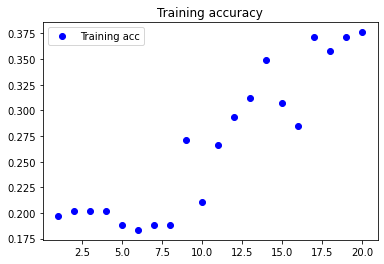

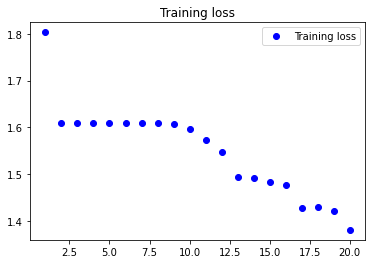

In [44]:
model.evaluate(validation_generator_aug, batch_size=16)
plot_history(history7)